In [65]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import imread
import pandas as pd
import numpy as np
from PIL import Image
import io
import os
from time import time

In [141]:
df = pd.read_csv('con_waldo64.csv') # read in the data

In [52]:
df.shape

(5376, 12289)

In [146]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)
X_train = train_set.drop('waldo',axis=1)
y_train = train_set['waldo']
X_test = test_set.drop('waldo',axis=1)
y_test = test_set['waldo']

In [39]:
from sklearn.decomposition import PCA
n = 70
pca = PCA(n_components=n)
X_reduced = pca.fit_transform(X_train)

In [40]:
pca.n_components_
pca.components_.shape

(70, 12288)

In [41]:
np.sum(pca.explained_variance_ratio_)

0.4896822210632998

In [58]:
# eigenvalues = pca.components_.reshape(-1,3)

# # # Extracting the PCA components ( eignevalues )
# # #eigenvalues = pca.components_.reshape(n_components, 28, 28)
# eigenvalues = pca.components_

In [59]:
# n_row = 4
# n_col = 7

# # Plot the first 8 eignenvalues
# plt.figure(figsize=(13,12))
# for i in list(range(n_row * n_col)):
# #     for offset in [10, 30,0]:
# #     plt.subplot(n_row, n_col, i + 1)
#     offset =0
#     plt.subplot(n_row, n_col, i + 1)
#     plt.imshow(eigenvalues[i].reshape(-1,3), cmap='jet')
#     title_text = 'Eigenvalue ' + str(i + 1)
#     plt.title(title_text, size=6.5)
#     plt.xticks(())
#     plt.yticks(())
# plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Target = y_train

In [70]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    name = Target,
    hoveron = Target,
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [71]:
pca = PCA(random_state=0, whiten=True)
pca.fit(X_train);

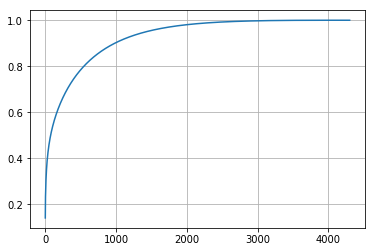

In [72]:
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(exp_var_cum.size), exp_var_cum)
plt.grid()

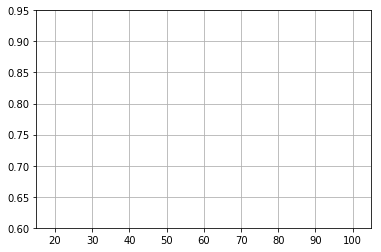

In [73]:
plt.plot(range(exp_var_cum.size), exp_var_cum, '-+')
plt.grid()
plt.xlim(15,105)
plt.ylim(0.6,0.95);

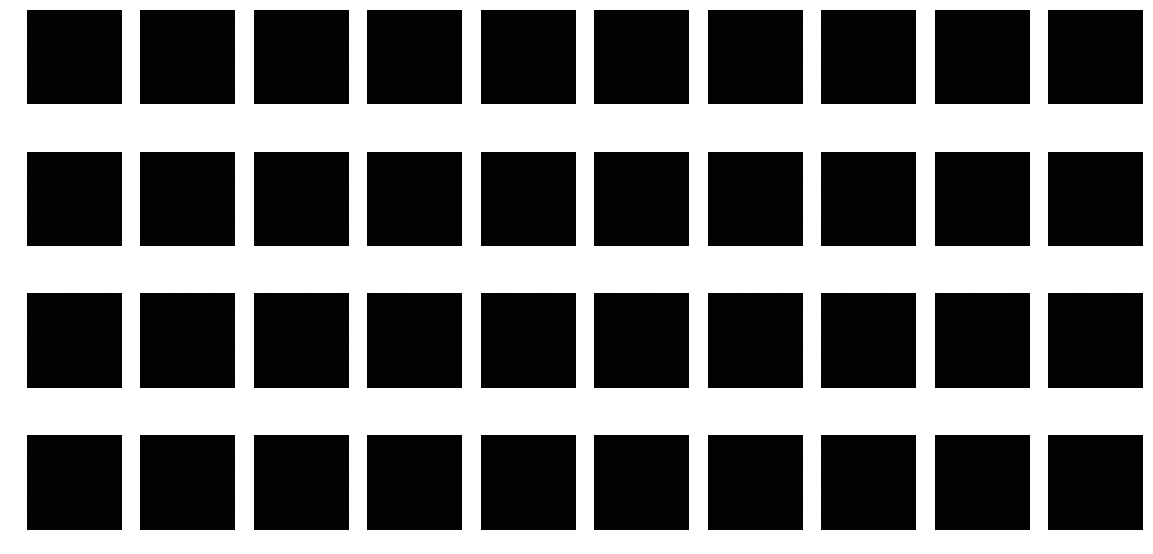

In [93]:
plt.figure(figsize=(20,10))
for k in range(40):
    plt.subplot(4,10,k+1)
    plt.imshow(pca.components_[0].reshape(3, 64, 64).transpose())
    plt.axis('off')

In [84]:
pix = np.arange(30)

In [85]:
pix.reshape(3, 10).transpose()

array([[ 0, 10, 20],
       [ 1, 11, 21],
       [ 2, 12, 22],
       [ 3, 13, 23],
       [ 4, 14, 24],
       [ 5, 15, 25],
       [ 6, 16, 26],
       [ 7, 17, 27],
       [ 8, 18, 28],
       [ 9, 19, 29]])

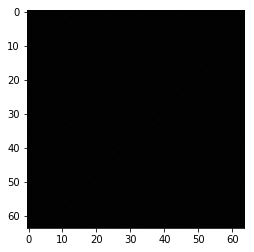

In [103]:
p = pca.components_[0].reshape(3, 64, 64).transpose().reshape(64,64, 3)
# plt.imshow(p)